In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from data_process import data_process

from scipy.fftpack import fft, fftfreq
from statsmodels.tsa.stattools import acf

D:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# data_hd = data_process(["002508.SZ", '600048.SH', '600219.SH','600170.SH','600219.SH', '600369.SH', '600372.SH'],
#                          "2016-01-01", "2024-12-31", data_savedir="./tmp_test/")
# tradedata = data_hd.data_load(filetime="2016-01-01_2024-12-31", restore="pre")

data_hd = data_process(["002508.SZ",'600048.SH' ],
                         "2020-01-01", "2025-2-18", data_savedir="./tmp_test/")
tradedata = data_hd.data_load(filetime="2020-01-01_2025-2-18", restore="pre")

# print(tradedata["002508.SZ"]["close_restore"].describe())
close_res = tradedata["002508.SZ"]["close_restore"]

 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  1.88it/s]

ed13f008c584df320f79a1b4295ba81f132df54a2b72cad256fe87f4


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.12it/s]


In [3]:
def data_pltshow(pre_close, peaks=None, valleys=None):
    plt.plot(pre_close)
    if(peaks is not None):
        for point in peaks:
            plt.scatter(point, pre_close[point], color='r')
    if(valleys is not None):
        for point in valleys:
            plt.scatter(point, pre_close[point], color='y')

    plt.show()


In [4]:
distance_set = 90
print(tradedata.keys())
for key in tradedata.keys():
    df = tradedata[key]
    pre_close_np = df['ma20'].values
    peaks, _ = find_peaks(pre_close_np, distance=distance_set)
    valleys, _ = find_peaks(-pre_close_np, distance=distance_set, prominence=1)
    # peaks = peaks+1
    # valleys = valleys+1
    #df['valleys'], _ = find_peaks(-df['pre_close'].tolist(), prominence=1)

    print(key)
    print(np.diff(peaks))
    print(np.diff(valleys))

    print(np.diff(peaks).std())
    print(np.diff(valleys).std())

dict_keys(['002508.SZ', '600048.SH'])
002508.SZ
[137  98 114 126 112 156 136 162 111]
[132 104 245 142 143 158 158]
20.35790864613663
40.63727051737162
600048.SH
[ 91  93 242  91 109 127  90 186 101]
[160 114 310 349  95]
50.336889744359475
104.08189083601431


[  25  162  260  374  500  612  688  768  904  979 1066 1177]
[  63  195  299  455  544  686  829  987 1145]
[137  98 114 126 112  76  80 136  75  87 111]
[132 104 156  89 142 143 158 158]
22.012768646198833
24.23195204683271


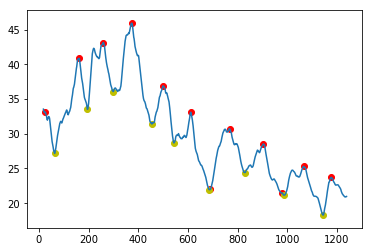

In [12]:
distance_set = 75
df = tradedata["002508.SZ"][1:]
pre_close_np = df['ma20'].values
peaks, _ = find_peaks(pre_close_np, distance=distance_set)
valleys, _ = find_peaks(-pre_close_np, distance=distance_set, prominence=1)
# peaks = peaks+1
# valleys = valleys+1
#df['valleys'], _ = find_peaks(-df['pre_close'].tolist(), prominence=1)

print(peaks)
print(valleys)

print(np.diff(peaks))
print(np.diff(valleys))

print(np.diff(peaks).std())
print(np.diff(valleys).std())

data_pltshow(pre_close_np, peaks, valleys )

[139  96 118 125 112 134 156 166 108]
[143 124 213 152 142 160 152  94]
21.534353834320832
31.52776554086889


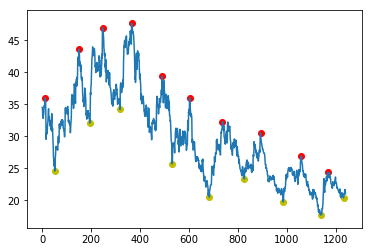

In [7]:
distance_set = 90
df = tradedata["002508.SZ"][1:]
pre_close_np = df['pre_close'].values
peaks, _ = find_peaks(pre_close_np, distance=distance_set)
valleys, _ = find_peaks(-pre_close_np, distance=distance_set, prominence=1)
# peaks = peaks+1
# valleys = valleys+1
#df['valleys'], _ = find_peaks(-df['pre_close'].tolist(), prominence=1)

print(np.diff(peaks))
print(np.diff(valleys))

print(np.diff(peaks).std())
print(np.diff(valleys).std())

data_pltshow(pre_close_np, peaks, valleys )

In [25]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [16]:
# 单位根检验
from statsmodels.tsa.stattools import adfuller

result = adfuller(pre_close[1:])
print('-------------------------------------------')
print('ADF检验结果：')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Lags Used: %d' % result[2])
print('Observations Used: %d' % result[3])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

-------------------------------------------
ADF检验结果：
ADF Statistic: -2.512992
p-value: 0.112345
Lags Used: 0
Observations Used: 2185
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [17]:
##### 差分运算
def diff(timeseries):
    new_df=timeseries.diff(periods=1).dropna()#dropna删除NaN
    new_df.plot(color='orange',title='diff1')
    return new_df

#进行一阶差分
ndf=diff(pre_close[1:])

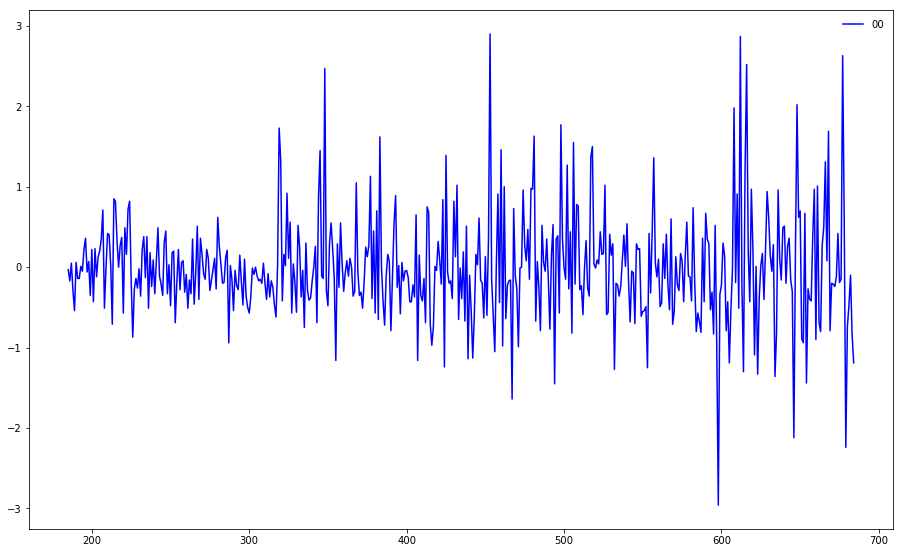

In [23]:
data_pltshow(ndf[1500:2000])

In [21]:
result = adfuller(ndf)
print('-------------------------------------------')
print('ADF检验结果：')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Lags Used: %d' % result[2])
print('Observations Used: %d' % result[3])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

-------------------------------------------
ADF检验结果：
ADF Statistic: -47.564072
p-value: 0.000000
Lags Used: 0
Observations Used: 2184
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


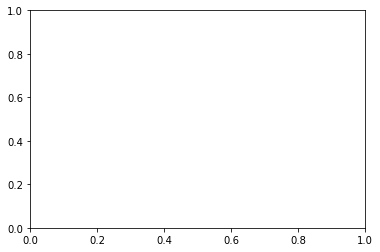

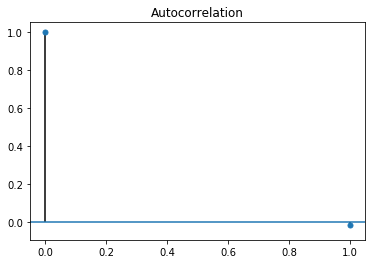

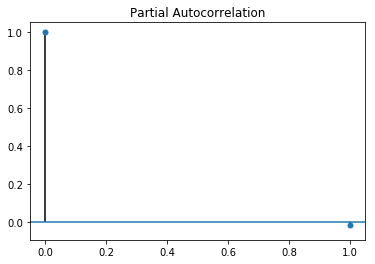

In [28]:
#模型选择：绘制ACF与PACF,即自相关图和偏自相关图
#### 绘制ACF与PACF的图像
def plot_acf_pacf(timeseries): #利用ACF和PACF判断模型阶数
    plot_acf(timeseries,lags=timeseries.shape[0]%2) #延迟数
    plot_pacf(timeseries,lags=timeseries.shape[0]%2)
    plt.show()
plot_acf_pacf(ndf)

In [31]:
#模型构建
print('-------------------------------------------')
model= ARIMA(ndf, order=(1, 1, 2)).fit()
print(model)
print(model.params)
print(model.summary())

-------------------------------------------


ValueError: Given a pandas object and the index does not contain dates